In [35]:
import torch
import time
import random
import numpy as np

In [10]:
x = torch.tensor([0,1])

In [11]:
x

tensor([0, 1])

In [12]:
x.item()

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

In [7]:
x = [0,0,1]

In [19]:
random.shuffle(x)
x

[0, 0, 1]

In [37]:
%timeit random.sample(x, 1)

2.41 µs ± 93.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [156]:
rand_list = [0]*9 + [1]

In [158]:
%timeit random.sample([0]*9 + [1], 1)[0]

2.82 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [159]:
%timeit random.sample(rand_list, 1)[0]

2.48 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [154]:
[0]*9 + [1]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [69]:
%timeit np.random.choice(2, 1)

31.1 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [81]:
liste = [np.random.choice(2,1,p=[0.3,0.7]) for i in range(100)]

In [83]:
unique, counts = np.unique(liste, return_counts=True)
dict(zip(unique, counts))

{0: 26, 1: 74}

In [85]:
%timeit np.random.choice(2,1,p=[0.3,0.7])

54.5 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [90]:
list_2 = [random.sample([0,0,1], 1) for i in range(1000)]

In [91]:
unique, counts = np.unique(list_2, return_counts=True)
dict(zip(unique, counts))

{0: 695, 1: 305}

In [96]:
random.sample([0,0,1], 1)[0]

0

In [94]:
random.randint(0,1)

0

In [147]:
epsilon = 0.1
u = random.random()
random_action = u <= epsilon
random_action

False

In [104]:
u

0.7301515102649503

In [105]:
random_action

False

In [150]:
list_3 = [1 if random.random() > 0.5 else 0 for i in range(1000)]

In [151]:
unique, counts = np.unique(list_3, return_counts=True)
dict(zip(unique, counts))

{0: 496, 1: 504}

# Look at epsilon decay

In [188]:
initial_epsilon = 0.5
final_epsilon = 1e-7
num_iters = 1000
final_epsilon

1e-07

In [ ]:
for iter in range(1000):
    epsilon = final_epsilon + (
                (num_iters - (iter+1)) * (initial_epsilon - final_epsilon) / num_iters)
    print("plus", ((num_iters - (iter+1))/ num_iters * (initial_epsilon - final_epsilon)))
    print(epsilon)

# E function as decay of exploration

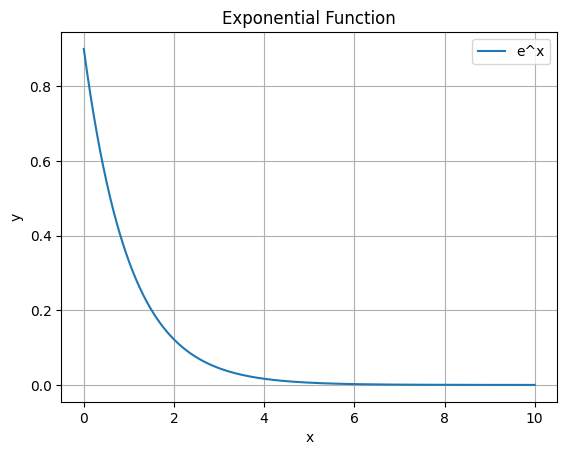

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_function(x):
    return 0.9*np.exp(-x)

# Generate x values
x_values = np.linspace(0, 10, 10_000)

# Calculate corresponding y values using the exponential function
y_values = exponential_function(x_values)

# Plot the function
plt.plot(x_values, y_values, label='e^x')
plt.title('Exponential Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [211]:
x_values[50_000]

5.000050000500005

In [212]:
0.9*np.exp(-6)

0.0022308769589997226

In [201]:
x = 100_000
y = 1e4
x /y

10.0

In [198]:
10_000

10000

In [6]:
x_v = 0.9*np.exp(-10)
-np.log(x_v/0.9)

10.0

In [7]:
-np.log(0.1/0.9)

2.197224577336219

In [3]:
for i in range(10):
    iter = i
    num_iter = 10
    no_act_prob = 9 - int(iter*10 / num_iter)
    print(no_act_prob if no_act_prob >1 else 1)

9
8
7
6
5
4
3
2
1
1


In [4]:
for i in range(10):
    iter = i
    num_iter = 10
    no_act_prob = 9 - int(iter*10 / num_iter)
    print(max(no_act_prob,1))

9
8
7
6
5
4
3
2
1
1


In [8]:
lr = 1e-2
end = 100
for i in range(100):
    if (i+1) % (100/4) == 0:
        lr = lr /10
        print(f"{i:<3}", lr)

24  0.001
49  0.0001
74  1e-05
99  1.0000000000000002e-06


In [12]:
lr = 1e-6
end = 100
lr = lr * 1e4
for i in range(100):
    if (i) % (100/4) == 0:
        lr = lr /10
        print(f"{i:<3}", lr)

0   0.001
25  0.0001
50  1e-05
75  1.0000000000000002e-06
